In [1]:
import pandas as pd

dau = pd.read_csv("section3-dau.csv", parse_dates=['log_date'])
dpu = pd.read_csv("section3-dpu.csv", parse_dates=['log_date'])
install = pd.read_csv("section3-install.csv", parse_dates=['install_date'])

In [2]:
# dauとインストール情報を結合させる
dau_install = pd.merge(dau, install, on=['app_name', 'user_id'])

# 上記の情報に、課金情報を結合させる
user_info = pd.merge(dau_install, dpu, on=['log_date', 'app_name', 'user_id'], how='left').fillna(0)

In [3]:
# 年月の単位の列を追加する
user_info['log_month'] = user_info['log_date'].apply(lambda x: str(x)[0:7])
user_info['install_month'] = user_info['install_date'].apply(lambda x: str(x)[0:7])

In [4]:
# アクセスした年月の列を追加
user_info['log_month'] = user_info['log_date'].apply(lambda x: str(x)[0:7])

# インストールした年月の列を追加
user_info['install_month'] = user_info['install_date'].apply(lambda x: str(x)[0:7])

In [58]:
user_info['new_user'] = user_info['log_month'] == user_info['install_month']
# アプリは一つしかないので、グルーピングしない
user_payment = user_info.groupby(['log_month', 'new_user'])['payment'].sum().unstack()
user_payment

new_user,False,True
log_month,,
2013-06,177886.0,49837.0
2013-07,177886.0,29199.0


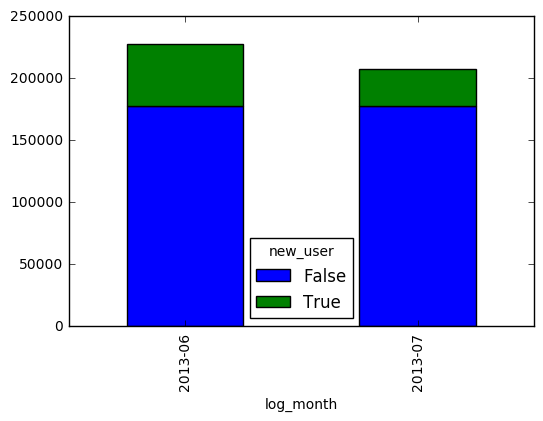

In [60]:
# 月ごとの新規ユーザーとそれ以外のユーザーの金額をグラフ化
user_payment.plot(kind='bar', stacked=True)

In [72]:
purchasers = user_info[user_info['payment'] > 0]
# 課金したことのあるユーザーの月別の金額
payment_info = purchasers.groupby(['log_month', 'user_id'], as_index=False)['payment'].sum()
payment_info.head(5)

,log_month,user_id,payment
0,2013-06,3,14994.0
1,2013-06,11,1937.0
2,2013-06,19,2633.0
3,2013-06,35,8808.0
4,2013-06,37,2572.0


In [73]:
# 課金の合計金額を2,000円ごとの情報にする
payment_info['payment_band'] = payment_info['payment'].apply(lambda x: int(int(x) / 2000) * 2000)
payment_info.head(5)

,log_month,user_id,payment,payment_band
0,2013-06,3,14994.0,14000
1,2013-06,11,1937.0,0
2,2013-06,19,2633.0,2000
3,2013-06,35,8808.0,8000
4,2013-06,37,2572.0,2000


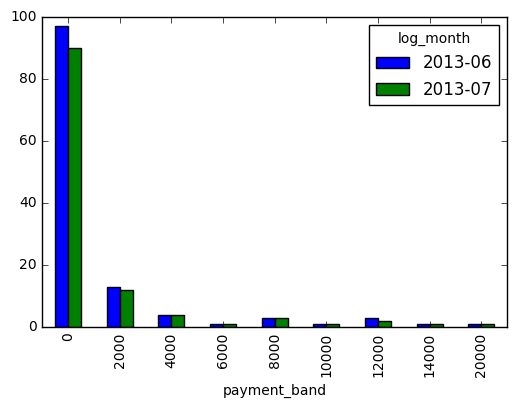

In [54]:
payment_info.groupby(['payment_band', 'log_month'])['user_id'].count().unstack().fillna(0).plot(kind='bar')